missing pattern table example

In [17]:
'''
This module implements the missing values table in Rattle, using Python

@Author: Charini Nanayakkara
'''

import sys
import pandas as pd

file_name = sys.argv[1]
# file_name='data_wrangling_education_2024_u7568823.csv'
file_name='merged_dataset.csv'

pattern_count_dict = {} # Dictionary to store patterns of row values (as in 
                        # rattle missing file table). The key is a pattern. The
                        # value is a tuple where the first value indicates the
                        # number of times a pattern occurs and the second value
                        # tells the number of variables with missing values per
                        # each pattern. 
table_value_list = [] # Table to contain missing value data as list of lists.
                      # The first value in the sub list is the missing value count 
                      # per row. Second value is a tuple containing the pattern
                      # and the missing variables per pattern.

df = pd.read_csv(file_name)
selected_columns = df[['marital_status', 'occupation', 'credit_card_number']]
# selected_columns = df[['street_address', 'suburb', 'postcode']]

# null_table = df.isnull()
null_table = selected_columns.isnull()
tot_missing_vals_per_var = null_table.sum(axis=0) # Total missing values per variable
total_missing_vals = tot_missing_vals_per_var.sum() # Total missing values

for index, row in null_table.iterrows():
  count,var_no = pattern_count_dict.get(tuple(row),(0,0))
  count += 1
  var_no = sum(row) # True = 1 and False = 0. Therefore, null values are counted
  pattern_count_dict[tuple(row)] = (count,var_no)
  

for key,value in pattern_count_dict.items():
  table_value_list.append([value[0], [int(not item) for item in key] + [value[1]]])
  
table_value_list.sort(reverse=True)

table_value_list.append(['',tot_missing_vals_per_var.tolist() + \
                         [total_missing_vals]])


data = [item[1] for item in table_value_list] # Data to write to table
columns_list = tot_missing_vals_per_var.index.tolist() + ['']
index_list = [item[0] for item in table_value_list]
# Create new pandas DataFrame 
new_df = pd.DataFrame(data, columns = columns_list, index = index_list) 
print('---------------')
print (new_df)


---------------
       marital_status  occupation  credit_card_number      
14575               1           1                   1     0
1430                0           0                   0     3
810                 0           1                   1     1
                 2240        1430                1430  5100


T3.1

In [1]:
import pandas as pd
from itertools import combinations

# Load the education dataset (assuming it's in CSV format)
education_data = pd.read_csv('data_wrangling_education_2024_u7568823.csv')

# List all attributes in the dataset
attributes = education_data.columns

# Create a list to store the combination of attributes and the count of missing values
missing_combinations = []

# Iterate over all combinations of three attributes
for combo in combinations(attributes, 3):
    # Count the number of rows where all three attributes are missing
    missing_count = education_data[list(combo)].isnull().all(axis=1).sum()
    
    # Store the combination and the count
    missing_combinations.append((combo, missing_count))

# Sort the combinations by the count of missing values in descending order
missing_combinations.sort(key=lambda x: x[1], reverse=True)

# Get the top combination with the highest number of missing values
top_combination = missing_combinations[0]

# Output the result
print(f"Combination of attributes with the most missing values: {top_combination[0]}")
print(f"Number of records with missing values for this combination: {top_combination[1]}")


Combination of attributes with the most missing values: ('occupation', 'salary', 'credit_card_number')
Number of records with missing values for this combination: 254


T3.1.b


In [6]:
import pandas as pd

# Load the datasets

medical_data = pd.read_csv('data_wrangling_medical_2024_u7568823.csv')
education_data = pd.read_csv('data_wrangling_education_2024_u7568823.csv')


# Ensure the 'ssn' columns are strings and strip any leading/trailing whitespaces
medical_data['ssn'] = medical_data['ssn'].astype(str).str.strip()
education_data['ssn'] = education_data['ssn'].astype(str).str.strip()

# Merge the datasets on SSN, keeping only common SSNs (inner join)
merged_data = pd.merge(medical_data, education_data, on='ssn', how='inner', suffixes=('_medical', '_education'))

# List of common attributes to handle missing values
common_attributes = ['first_name', 'middle_name', 'last_name', 'gender', 'birth_date', 'street_address', 'suburb', 'postcode', 'state', 'phone', 'email']

# Replace missing values from one dataset with non-missing values from the other dataset
for attr in common_attributes:
    merged_data[attr] = merged_data[f'{attr}_medical'].combine_first(merged_data[f'{attr}_education'])

# Now that missing values have been replaced, let's count the number of missing values for each attribute
missing_values_count = merged_data.isnull().sum()

# Output the missing value counts
print("Missing value counts for merged dataset (before deduplication):")
print(missing_values_count)

print('-----------------')

from itertools import combinations

# Load the merged dataset from the previous steps
# Assuming that the merged dataset already exists as 'merged_data'
# Otherwise, you can rerun the previous merging code provided

# List all attributes in the merged dataset after handling missing values
attributes = merged_data.columns.tolist()

# Create a list to store the combination of attributes and the count of missing values
missing_combinations = []

# Iterate over all combinations of three attributes
for combo in combinations(attributes, 3):
    # Count the number of rows where all three attributes are missing
    missing_count = merged_data[list(combo)].isnull().all(axis=1).sum()
    
    # Store the combination and the count
    missing_combinations.append((combo, missing_count))

# Sort the combinations by the count of missing values in descending order
missing_combinations.sort(key=lambda x: x[1], reverse=True)

# Get the top combination with the highest number of missing values
top_combination = missing_combinations[0]

# Output the result
print(f"Combination of attributes with the most missing values: {top_combination[0]}")
print(f"Number of records with missing values for this combination: {top_combination[1]}")


Missing value counts for merged dataset (before deduplication):
rec_id_medical                 0
ssn                            0
first_name_medical             0
middle_name_medical         1652
last_name_medical              0
gender_medical                 0
age_at_consultation            0
birth_date_medical             0
medicare_number                0
street_address_medical         0
suburb_medical                 0
postcode_medical            3320
state_medical                  0
phone_medical               6759
email_medical               4928
marital_status              2240
height                         0
weight                         0
bmi                            0
blood_pressure                 0
cholesterol_level              0
smoking_status                 0
clinical_notes                 0
consultation_timestamp         0
rec_id_education               0
first_name_education           0
middle_name_education       1712
last_name_education            0
gender_educa

t3 .1 .b output merged data and missing pattern shown

In [6]:
import pandas as pd
from itertools import combinations

# Load the datasets
medical_data = pd.read_csv('data_wrangling_medical_2024_u7568823.csv')
education_data = pd.read_csv('data_wrangling_education_2024_u7568823.csv')

# Ensure the 'ssn' columns are strings and strip any leading/trailing whitespaces
medical_data['ssn'] = medical_data['ssn'].astype(str).str.strip()
education_data['ssn'] = education_data['ssn'].astype(str).str.strip()

# Merge the datasets on SSN, keeping only common SSNs (inner join)
merged_data = pd.merge(medical_data, education_data, on='ssn', how='inner', suffixes=('_medical', '_education'))

# List of common attributes to handle missing values
common_attributes = ['first_name', 'middle_name', 'last_name', 'gender', 'birth_date', 'street_address', 'suburb', 'postcode', 'state', 'phone', 'email']

# Replace missing values from one dataset with non-missing values from the other dataset
for attr in common_attributes:
    merged_data[attr] = merged_data[f'{attr}_medical'].combine_first(merged_data[f'{attr}_education'])
    # Drop the original columns with suffixes
    merged_data.drop(columns=[attr + '_medical', attr + '_education'], inplace=True)


# Save the merged dataset to a CSV file before deduplication
merged_data.to_csv('merged_dataset_Ez.csv', index=False)

print("Merged dataset has been saved as 'merged_dataset.csv'.")

# Now, find the combination of three attributes with the most missing values

# List all attributes in the merged dataset (use only non-suffix versions of common attributes)
attributes_to_check = common_attributes + [col for col in merged_data.columns if col not in common_attributes]


# # Include unique attributes from both datasets
# # Attributes unique to the medical dataset
# medical_unique_attrs = [col for col in medical_data.columns if col not in education_data.columns and col != 'ssn']
# # Attributes unique to the employment dataset
# employment_unique_attrs = [col for col in education_data.columns if col not in medical_data.columns and col != 'ssn']

# # Add unique attributes to the merged dataset
# # For medical unique attributes
# for attr in medical_unique_attrs:
#     merged_data[attr] = merged_data[attr + '_medical'] if attr + '_medical' in merged_data.columns else merged_data[attr]
#     if attr + '_medical' in merged_data.columns:
#         merged_data.drop(columns=[attr + '_medical'], inplace=True)

# # For employment unique attributes
# for attr in employment_unique_attrs:
#     merged_data[attr] = merged_data[attr + '_education'] if attr + '_education' in merged_data.columns else merged_data[attr]
#     if attr + '_education' in merged_data.columns:
#         merged_data.drop(columns=[attr + '_education'], inplace=True)

# attributes_to_check  = [col for col in merged_data.columns if col != 'ssn']
# Create a list to store the combination of attributes and the count of missing values
missing_combinations = []

# Iterate over all combinations of three attributes
for combo in combinations(attributes_to_check, 3):
    # Count the number of rows where all three attributes are missing
    missing_count = merged_data[list(combo)].isnull().all(axis=1).sum()
    
    # Store the combination and the count
    missing_combinations.append((combo, missing_count))

# Sort the combinations by the count of missing values in descending order
missing_combinations.sort(key=lambda x: x[1], reverse=True)

# Get the top combination with the highest number of missing values
top_combination = missing_combinations[0]

# Output the result
print(f"Combination of attributes with the most missing values: {top_combination[0]}")
print(f"Number of records with missing values for this combination: {top_combination[1]}")

# Optionally, save the results of the top missing pattern combination to a CSV file
with open('missing_pattern_combination.txt', 'w') as f:
    f.write(f"Combination of attributes with the most missing values: {top_combination[0]}\n")
    f.write(f"Number of records with missing values for this combination: {top_combination[1]}\n")

print("Missing pattern combination has been saved to 'missing_pattern_combination.txt'.")


Merged dataset has been saved as 'merged_dataset.csv'.
Combination of attributes with the most missing values: ('marital_status', 'occupation', 'credit_card_number')
Number of records with missing values for this combination: 1430
Missing pattern combination has been saved to 'missing_pattern_combination.txt'.


task3 .2

In [7]:
import pandas as pd


# Load the merged dataset (if not already loaded)
merged_data = pd.read_csv('merged_dataset_Ez.csv')

# Assuming the merged dataset has already been generated as 'merged_data'

# Calculate the number of missing values for each attribute
missing_values_count = merged_data.isnull().sum()

# Sort the attributes by the number of missing values in descending order
sorted_missing_values = missing_values_count.sort_values(ascending=False)

# Get the top two attributes with the highest number of missing values
top_two_missing = sorted_missing_values.head(2)

# Output the result
print("Top 2 attributes with the highest number of missing values:")
print(top_two_missing)


Top 2 attributes with the highest number of missing values:
salary            2510
marital_status    2240
dtype: int64


task3.2 regression salary

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import pandas as pd

merged_data = pd.read_csv('merged_dataset_Ez.csv')

# Assuming 'merged_data' is already loaded and contains the salary, occupation, and education data

# Select features to use for predicting salary
features = ['years_of_experience', 'age_at_consultation', 'occupation', 'education']  # Adding 'education'

# Encode the 'occupation' and 'education' features (categorical) to numerical using LabelEncoder
le_occupation = LabelEncoder()
le_education = LabelEncoder()

# Apply Label Encoding to 'occupation' and 'education'
merged_data['occupation_encoded'] = le_occupation.fit_transform(merged_data['occupation'].astype(str))
merged_data['education_encoded'] = le_education.fit_transform(merged_data['education'].astype(str))

# Update features to include the encoded 'occupation' and 'education'
features = ['years_of_experience', 'age_at_consultation', 'occupation_encoded', 'education_encoded']

# Create a dataframe with no missing salary values to train the regression model
train_data = merged_data[merged_data['salary'].notnull()]
X_train = train_data[features]
y_train = train_data['salary']

# Create a dataframe with missing salary values
test_data = merged_data[merged_data['salary'].isnull()]
X_test = test_data[features]

# Train the regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict missing salary values
predicted_salary = lr_model.predict(X_test)

# Fill the missing salary values with the predicted values
merged_data.loc[merged_data['salary'].isnull(), 'salary'] = predicted_salary

# Check if all missing salary values have been filled
print("Missing salary values after imputation:", merged_data['salary'].isnull().sum())
merged_data.to_csv('files/merged_dataset_Ez_salary_imputation.csv', index=False)


Missing salary values after imputation: 0


task 3.2 output salary/marital_status            missing value

In [1]:
import pandas as pd

merged_data = pd.read_csv('merged_dataset_Ez.csv')

# Assuming 'merged_data' is already loaded and contains the salary column

# Filter rows where 'salary' is missing (NaN)
missing_salary_data = merged_data[merged_data['salary'].isnull()]

# Output the rows with missing salary
print("Rows with missing salary:")
print(missing_salary_data)

# Optionally, save the filtered data with missing salary to a CSV file
missing_salary_data.to_csv('files/missing_salary_data.csv', index=False)

print("Data with missing salary has been saved as 'missing_salary_data.csv'.")


Rows with missing salary:
      rec_id_medical         ssn  age_at_consultation      medicare_number  \
2          rec-56205  h140232568                   26   6412  99055  1  1    
11         rec-15247  d199079239                   55   2581  97622  2  2    
30         rec-40795  i135279930                   38   3759  76309  2  2    
35          rec-8598  i150642589                   21   3385  37618  2  3    
44         rec-49211  b123997021                   28   4474  57064  2  2    
...              ...         ...                  ...                  ...   
16778      rec-53230  h131934275                   28   5102  69110  1  1    
16788      rec-55608  a120761493                   21   4240  39886  2  3    
16790      rec-86503  h199331603                   11   9496  85428  1  2    
16799      rec-81768  e186539763                   60   5350  77388  2  2    
16807      rec-12619  a105429563                   75   1160  93490  2  1    

         marital_status  height  weig

In [2]:
import pandas as pd

merged_data = pd.read_csv('merged_dataset_Ez.csv')

# Assuming 'merged_data' is already loaded and contains the salary column

# Filter rows where 'salary' is missing (NaN)
missing_salary_data = merged_data[merged_data['employment_timestamp'].isnull()]

# Output the rows with missing salary
print("Rows with missing salary:")
print(missing_salary_data)

# Optionally, save the filtered data with missing salary to a CSV file
# missing_salary_data.to_csv('files/missing_education_data.csv', index=False)

print("Data with missing salary has been saved as 'missing_salary_data.csv'.")


Rows with missing salary:
Empty DataFrame
Columns: [rec_id_medical, ssn, age_at_consultation, medicare_number, marital_status, height, weight, bmi, blood_pressure, cholesterol_level, smoking_status, clinical_notes, consultation_timestamp, rec_id_education, current_age, education, occupation, salary, credit_card_number, years_of_experience, employment_timestamp, first_name, middle_name, last_name, gender, birth_date, street_address, suburb, postcode, state, phone, email]
Index: []

[0 rows x 32 columns]
Data with missing salary has been saved as 'missing_salary_data.csv'.


In [18]:
import pandas as pd

merged_data = pd.read_csv('merged_dataset_Ez.csv')

# Assuming 'merged_data' is already loaded and contains the salary column

# Filter rows where 'salary' is missing (NaN)
missing_salary_data = merged_data[merged_data['marital_status'].isnull()]

# Output the rows with missing salary
print("Rows with missing marital_status:")
print(missing_salary_data)

# Optionally, save the filtered data with missing salary to a CSV file
missing_salary_data.to_csv('files/missing_marital_status.csv', index=False)

print("Data with missing salary has been saved as 'missing_salary_data.csv'.")


Rows with missing marital_status:
      rec_id_medical         ssn  age_at_consultation      medicare_number  \
1          rec-63860  e141846696                   15   1387  33065  1  3    
20         rec-11088  d179725160                   10   2447  18788  1  2    
26         rec-10707  a134698894                   11   4076  94639  2  3    
66         rec-28273  b185031612                    5   9293  18407  2  3    
68         rec-59957  a132601276                   12   2736  73792  1  2    
...              ...         ...                  ...                  ...   
16790      rec-86503  h199331603                   11   9496  85428  1  2    
16797      rec-30380  c155601802                    9   3390  82757  1  3    
16802      rec-67054  d161523646                   10   8425  57673  1  2    
16806      rec-17943  d104281639                    6   2533  52341  1  3    
16808      rec-43793  d136644076                    9   2399  36590  1  3    

      marital_status  height 

task3.2 regression marital_status

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

merged_data = pd.read_csv('merged_dataset_Ez.csv')

# Select features and the target for predicting marital status
features = ['age_at_consultation', 'gender', 'occupation','education']  # You can add more features if necessary

# Encode categorical features like 'occupation' and 'gender' for the model
merged_data['occupation_encoded'] = LabelEncoder().fit_transform(merged_data['occupation'].astype(str))
merged_data['gender_encoded'] = LabelEncoder().fit_transform(merged_data['gender'].astype(str))
merged_data['education_encoded'] = le_education.fit_transform(merged_data['education'].astype(str))


# Update features to include encoded values
features = ['age_at_consultation', 'occupation_encoded', 'gender_encoded','education_encoded']

# Create a dataframe with no missing marital status values
train_data = merged_data[merged_data['marital_status'].notnull()]
X_train = train_data[features]
y_train = train_data['marital_status']

# Create a dataframe with missing marital status values
test_data = merged_data[merged_data['marital_status'].isnull()]
X_test = test_data[features]
 
# Train the multinomial logistic regression model
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logistic_model.fit(X_train, y_train)

# Predict missing marital status values
predicted_marital_status = logistic_model.predict(X_test)

# Fill the missing marital status values with the predicted values
merged_data.loc[merged_data['marital_status'].isnull(), 'marital_status'] = predicted_marital_status

# Check if all missing marital status values have been filled
print("Missing marital status values after imputation:", merged_data['marital_status'].isnull().sum())
merged_data.to_csv('files/merged_dataset_Ez_marital_imputation.csv', index=False)


e:\PY\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
e:\PY\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Missing marital status values after imputation: 0


task3.2 salary correlation numerical

Correlation of numerical features with salary (ignoring missing values):
salary                 1.000000
height                 0.335408
current_age            0.197198
years_of_experience    0.176602
bmi                    0.139533
weight                 0.119276
blood_pressure         0.007006
Name: salary, dtype: float64


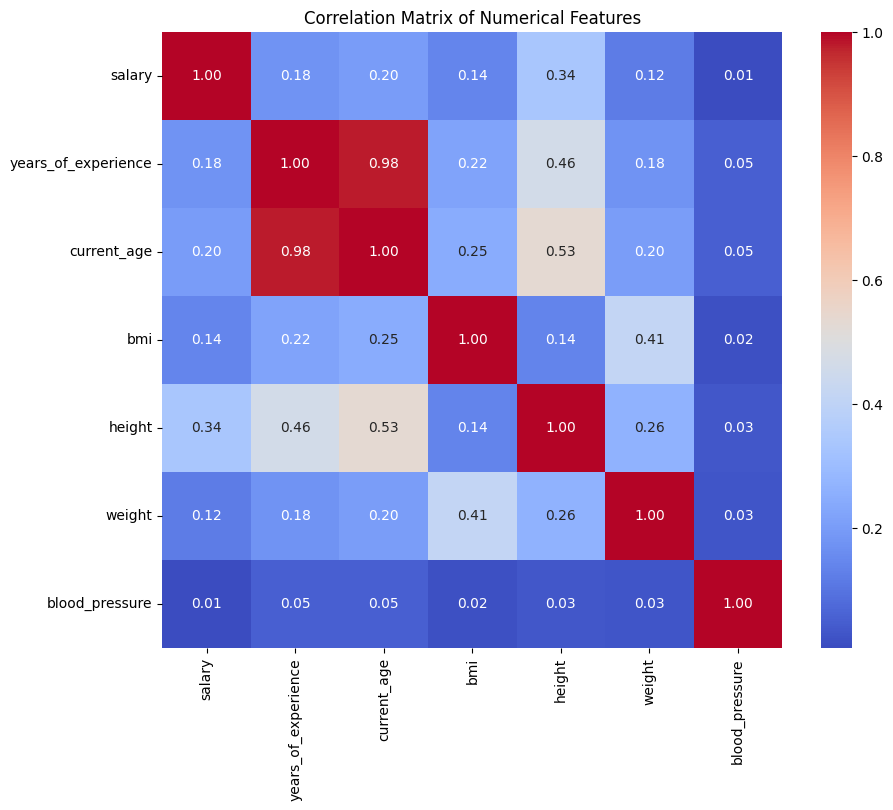

In [3]:
import pandas as pd
import numpy as np

# Load the merged dataset
merged_data = pd.read_csv('merged_dataset_Pro.csv')

# Select the relevant numerical features for correlation calculation
# You can adjust the list based on the actual numerical attributes in your dataset
numerical_features = [
    'salary', 
    'years_of_experience', 
    'current_age', 
    'bmi', 
    'height', 
    'weight', 
    'blood_pressure', 
    # Add any other numerical features you want to consider
]

# Filter the dataset to include only the relevant numerical features
numerical_data = merged_data[numerical_features]

# Calculate the correlation matrix ignoring missing values
# By default, the .corr() method ignores missing values (NaN)
correlation_matrix = numerical_data.corr()

# Display the correlation of each attribute with salary, sorted by strength of correlation
salary_correlation = correlation_matrix['salary'].sort_values(ascending=False)
print("Correlation of numerical features with salary (ignoring missing values):")
print(salary_correlation)

# Optionally, save the correlation results to a CSV file for further analysis
salary_correlation.to_csv('salary_correlation.csv', header=True)

# Visualize the correlation matrix as a heatmap (optional)
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a heatmap for better visualization of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


task3.2 salary correlation category

Correlation of encoded categorical features with salary (ignoring missing values):
salary                    1.000000
state_encoded             0.016242
gender_encoded            0.002951
postcode_encoded         -0.006643
suburb_encoded           -0.017855
marital_status_encoded   -0.073462
occupation_encoded       -0.082529
education_encoded        -0.427379
Name: salary, dtype: float64


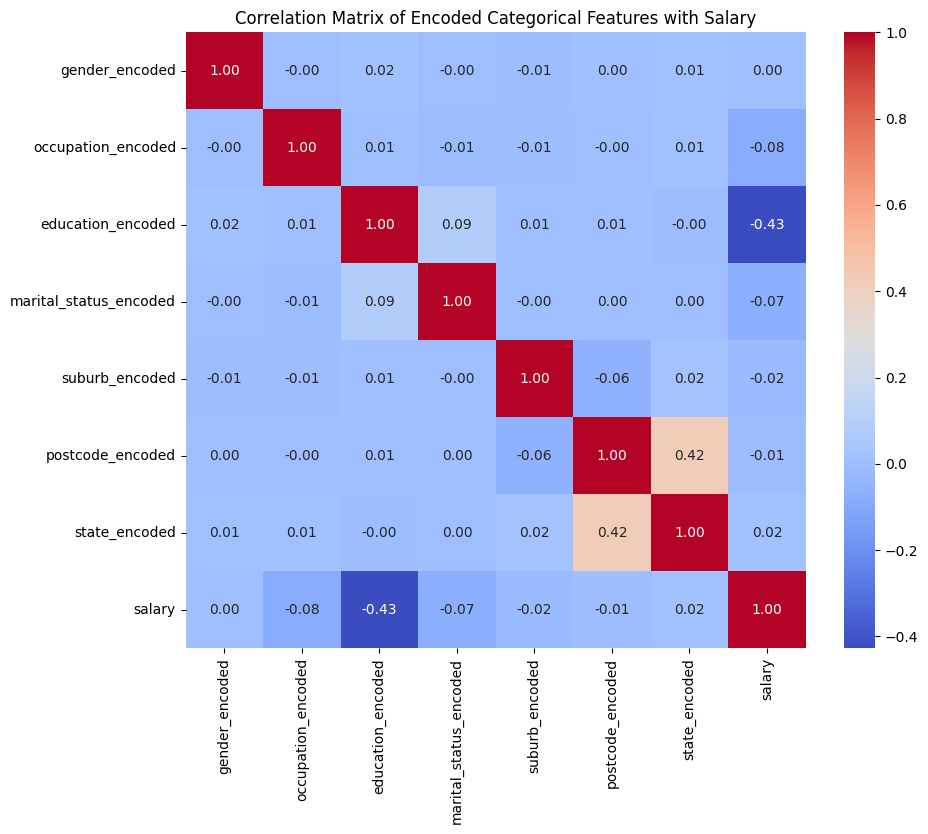

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the merged dataset
merged_data = pd.read_csv('merged_dataset_Pro.csv')

# Select the categorical features you want to analyze
categorical_features = [
    'gender', 
    'occupation', 
    'education', 
    'marital_status','suburb','postcode','state'
    # Add any other categorical features
]

# Initialize LabelEncoder for encoding categorical attributes
le = LabelEncoder()

# Create a copy of the dataset to store the encoded categorical data
encoded_data = merged_data.copy()

# Encode each categorical feature
for feature in categorical_features:
    encoded_data[feature + '_encoded'] = le.fit_transform(merged_data[feature].astype(str))

# Select the encoded categorical features along with salary for correlation calculation
encoded_features = [feature + '_encoded' for feature in categorical_features]
encoded_features.append('salary')

# Filter the dataset to include only the encoded features
categorical_data = encoded_data[encoded_features]

# Calculate the correlation matrix ignoring missing values
categorical_correlation_matrix = categorical_data.corr()

# Display the correlation of each categorical attribute with salary, sorted by strength of correlation
categorical_salary_correlation = categorical_correlation_matrix['salary'].sort_values(ascending=False)
print("Correlation of encoded categorical features with salary (ignoring missing values):")
print(categorical_salary_correlation)

# Optionally, save the correlation results to a CSV file for further analysis
categorical_salary_correlation.to_csv('categorical_salary_correlation.csv', header=True)

# Visualize the correlation matrix as a heatmap (optional)
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a heatmap for better visualization of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(categorical_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Encoded Categorical Features with Salary')
plt.show()


task 3.2 marital_status Correlation  Numerical Features 

Correlation of numerical features with marital_status (ignoring missing values):
marital_status_encoded    1.000000
blood_pressure            0.005136
weight                   -0.048011
bmi                      -0.053465
salary                   -0.073462
years_of_experience      -0.080317
current_age              -0.095416
height                   -0.131242
Name: marital_status_encoded, dtype: float64


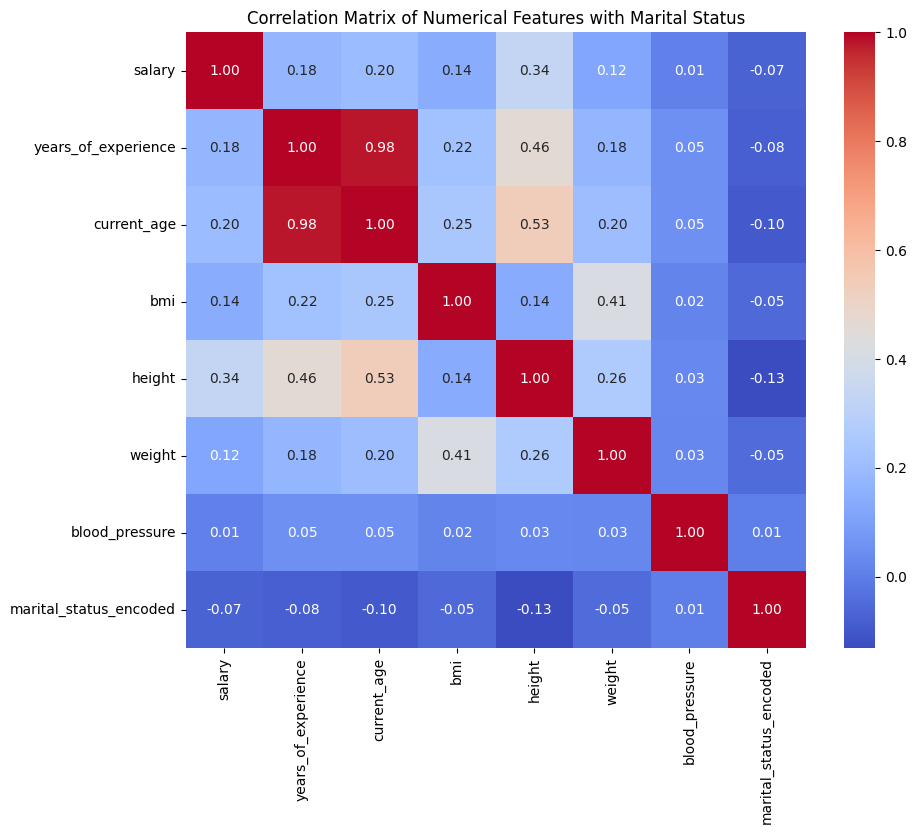

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the merged dataset
merged_data = pd.read_csv('merged_dataset_Pro.csv')

# Select numerical features that may correlate with marital_status
numerical_features = [
    'salary', 
    'years_of_experience', 
    'current_age', 
    'bmi', 
    'height', 
    'weight', 
    'blood_pressure', 
    # Add any other numerical features you want to consider
]

# Encode the 'marital_status' categorical feature to numerical using LabelEncoder
le = LabelEncoder()
merged_data['marital_status_encoded'] = le.fit_transform(merged_data['marital_status'].astype(str))

# Select the encoded 'marital_status' feature and the numerical features for correlation
features_to_correlate = numerical_features + ['marital_status_encoded']

# Filter the dataset to include only the selected features
numerical_data = merged_data[features_to_correlate]

# Calculate the correlation matrix ignoring missing values
numerical_correlation_matrix = numerical_data.corr()

# Display the correlation of each numerical feature with marital_status, sorted by strength of correlation
marital_status_correlation = numerical_correlation_matrix['marital_status_encoded'].sort_values(ascending=False)
print("Correlation of numerical features with marital_status (ignoring missing values):")
print(marital_status_correlation)

# Optionally, save the correlation results to a CSV file for further analysis
# marital_status_correlation.to_csv('marital_status_numerical_correlation.csv', header=True)

# Visualize the correlation matrix as a heatmap (optional)
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a heatmap for better visualization of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features with Marital Status')
plt.show()


task 3.2 marital_status Correlation  Categorical  Features 

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Load the merged dataset
merged_data = pd.read_csv('merged_dataset_Pro.csv')

# Select categorical features to analyze
categorical_features = [
    'gender', 
    'occupation', 
    'education', 
    # Add any other categorical features to analyze
]

# Encode the 'marital_status' categorical feature to numerical using LabelEncoder
le = LabelEncoder()
merged_data['marital_status_encoded'] = le.fit_transform(merged_data['marital_status'].astype(str))

# Calculate Cramér's V between marital_status and each categorical feature
for feature in categorical_features:
    confusion_matrix = pd.crosstab(merged_data['marital_status_encoded'], merged_data[feature])
    cramer_v_value = cramers_v(confusion_matrix.to_numpy())
    print(f"Cramér's V between 'marital_status' and '{feature}': {cramer_v_value:.4f}")


Cramér's V between 'marital_status' and 'gender': 0.0102
Cramér's V between 'marital_status' and 'occupation': 0.3916
Cramér's V between 'marital_status' and 'education': 0.2917


task4 .1 which kinds of education

In [1]:
import pandas as pd

# Assuming 'merged_dataset' is your DataFrame with the 'education' attribute
merged_dataset = pd.read_csv('files/merged_dataset_Pro_maritalStatusAndSalary_imputation.csv')

# Check the unique values in the 'education' attribute
unique_education_levels = merged_dataset['education'].unique()

# Print the unique values
print("Unique education levels in the dataset:")
print(unique_education_levels)

# You can also get the counts of each unique value using value_counts
education_counts = merged_dataset['education'].value_counts()

# Print the counts of each education level
print("\nCounts of each education level:")
print(education_counts)


Unique education levels in the dataset:
['certificate-iii' 'senior-secondary-school' 'certificate-i'
 'advance-diploma' 'diploma' 'certificate-ii' 'bachelor-degree'
 'secondary-school' 'graduate-certificate' 'certificate-iv'
 'masters-degree' 'pre-school' 'doctoral-degree' 'primary-school'
 'graduate-diploma']

Counts of each education level:
education
senior-secondary-school    2347
secondary-school           1730
bachelor-degree            1584
advance-diploma            1583
certificate-i              1403
certificate-iv             1398
certificate-iii            1351
certificate-ii             1315
diploma                    1297
graduate-diploma            796
graduate-certificate        659
primary-school              581
masters-degree              386
doctoral-degree             321
pre-school                   64
Name: count, dtype: int64


In [3]:
import pandas as pd

# Assuming 'merged_dataset' is your DataFrame with the 'education' attribute
merged_dataset = pd.read_csv('files/merged_dataset_Pro_maritalStatusAndSalary_imputation.csv')

# Check the unique values in the 'education' attribute
unique_education_levels = merged_dataset['occupation'].unique()

# Print the unique values
print("Unique occupation levels in the dataset:")
print(unique_education_levels)

# You can also get the counts of each unique value using value_counts
education_counts = merged_dataset['occupation'].value_counts()

# Print the counts of each education level
print("\nCounts of each occupation level:")
print(education_counts)


Unique occupation levels in the dataset:
['re-tired' 'casual-worker' 'other-clerical-worker'
 'education-professional' 'ict-professional' 'farm-worker'
 'health-support-worker' 'automotive-worker' 'other-worker'
 'other-technician' 'ict-technician' 'construction-worker'
 'construction-labourer' 'manager' 'legal-professional'
 'health-professional' nan 'machinary-driver' 'general-manager'
 'factory-worker' 'secretary' 'looking-for-employment' 'chief-executive'
 'cleaner' 'other-service-worker' 'engineering-worker' 'un-employed'
 'part-time-worker' 'art-media-professional' 'taxi-driver'
 'personal-services-worker' 'clerks' 'other-labourer' 'personal-assistant'
 'clerical-worker' 'carer' 'legislator' 'shop-assistent']

Counts of each occupation level:
occupation
other-technician            1782
ict-technician              1761
casual-worker                887
engineering-worker           658
automotive-worker            652
other-worker                 642
construction-worker          594

In [5]:
import pandas as pd

# Assuming 'merged_dataset' is your DataFrame with the 'education' attribute
merged_dataset = pd.read_csv('data_wrangling_education_2024_u7568823.csv')

# Check the unique values in the 'education' attribute
unique_education_levels = merged_dataset['education'].unique()

# Print the unique values
print("Unique occupation levels in the dataset:")
print(unique_education_levels)

# You can also get the counts of each unique value using value_counts
education_counts = merged_dataset['education'].value_counts()

# Print the counts of each education level
print("\nCounts of each occupation level:")
print(education_counts)


Unique occupation levels in the dataset:
['certificate-iii' 'senior-secondary-school' 'certificate-i'
 'advance-diploma' 'bachelor-degree' 'diploma' 'certificate-ii'
 'secondary-school' 'graduate-certificate' 'certificate-iv'
 'primary-school' 'masters-degree' 'graduate-diploma' 'doctoral-degree'
 'pre-school']

Counts of each occupation level:
education
senior-secondary-school    2789
secondary-school           2060
advance-diploma            1892
bachelor-degree            1877
certificate-i              1687
certificate-iv             1668
certificate-iii            1596
diploma                    1566
certificate-ii             1544
graduate-diploma            931
graduate-certificate        774
primary-school              694
masters-degree              468
doctoral-degree             381
pre-school                   73
Name: count, dtype: int64


task 4.4  years_of_experience  and current_age

In [6]:
import pandas as pd
import numpy as np

# Assuming 'merged_dataset' is your DataFrame with 'years_of_experience' and 'current_age'
merged_dataset = pd.read_csv('files/merged_dataset_Pro_maritalStatusAndSalary_imputation.csv')

# Define a function to check for inconsistencies
def check_experience_vs_age(row):
    # Assuming a person starts working at 18 years old
    max_possible_experience = row['current_age'] - 18
    if pd.isnull(row['years_of_experience']) or pd.isnull(row['current_age']):
        return False  # Leave NaN values as they are, do not flag them as incorrect
    if row['years_of_experience'] > max_possible_experience:
        return True  # Flag this row as incorrect
    return False  # No inconsistency

# Apply the function to create a mask for inconsistent rows
inconsistent_mask = merged_dataset.apply(check_experience_vs_age, axis=1)

# Extract the rows with inconsistencies
inconsistent_data = merged_dataset[inconsistent_mask]

# Output the inconsistent data to a CSV file
output_file = 'year_check_merged_dataset.csv'
inconsistent_data.to_csv(output_file, index=False)

# Print the inconsistent data and the location of the saved file
print("Inconsistent rows:")
print(inconsistent_data[['current_age', 'years_of_experience']].head())
print(f"The inconsistent data has been saved to: {output_file}")

# Optionally, count the number of inconsistent rows
inconsistent_count = len(inconsistent_data)
print(f"Number of inconsistent rows: {inconsistent_count}")



Inconsistent rows:
    current_age  years_of_experience
1            16                    3
20           14                    0
26           13                    0
30           37                   21
66            5                    0
The inconsistent data has been saved to: year_check_merged_dataset.csv
Number of inconsistent rows: 2495


drop duplicate ssn  

In [8]:

import pandas as pd


merged_dataset = pd.read_csv('files/merged_dataset_Pro_maritalStatusAndSalary_imputation.csv')

# Remove duplicate records based on 'ssn' and key attributes
merged_dataset = merged_dataset.sort_values('employment_timestamp').drop_duplicates(
    subset=['ssn'], keep='last'
)

merged_dataset.to_csv('files/dropDupliSsn.csv', index=False)

wrong bmi

In [10]:
import pandas as pd
import numpy as np

# Assuming 'merged_dataset' is your DataFrame and it contains 'height', 'weight', and 'bmi' columns
merged_dataset = pd.read_csv('files/merged_dataset_Pro_maritalStatusAndSalary_imputation.csv')

# Function to calculate BMI from height and weight
def calculate_bmi(row):
    if pd.isnull(row['height']) or pd.isnull(row['weight']):
        return np.nan  # If either height or weight is missing, return NaN
    height_in_meters = row['height'] / 100  # Convert height from cm to meters
    return row['weight'] / (height_in_meters ** 2)  # Calculate BMI

# Apply the function to calculate BMI for each row
merged_dataset['calculated_bmi'] = merged_dataset.apply(calculate_bmi, axis=1)

# Identify rows where the calculated BMI differs from the recorded BMI
# Using a small tolerance for floating-point comparison (e.g., 0.5 difference)
incorrect_bmi = merged_dataset[
    np.abs(merged_dataset['bmi'] - merged_dataset['calculated_bmi']) > 1
]

# Output the incorrect BMI data to a CSV file
output_file = 'files/incorrect_bmi_data.csv'
incorrect_bmi.to_csv(output_file, index=False)

# Print a sample of the incorrect BMI data and the location of the saved file
print("Rows with incorrect BMI values:")
print(incorrect_bmi[['height', 'weight', 'bmi', 'calculated_bmi']].head())
print(f"The incorrect BMI data has been saved to: {output_file}")

# Optionally, count the number of incorrect BMI rows
incorrect_bmi_count = len(incorrect_bmi)
print(f"Number of incorrect BMI rows: {incorrect_bmi_count}")


Rows with incorrect BMI values:
    height  weight  bmi  calculated_bmi
10     169     -99   21      -34.662652
35     178     -99   20      -31.246055
37     180     -99   16      -30.555556
40     186     -99   37      -28.616025
60     196     -99   28      -25.770512
The incorrect BMI data has been saved to: files/incorrect_bmi_data.csv
Number of incorrect BMI rows: 1648


wrong email into the phone or vice versa

In [11]:
import pandas as pd
import re

# Assuming 'merged_dataset' is your DataFrame and it contains 'email' and 'phone' columns
merged_dataset = pd.read_csv('files/merged_dataset_Pro_maritalStatusAndSalary_imputation.csv')

# Function to check if a value looks like a phone number (10 or more digits)
def looks_like_phone(value):
    if pd.isnull(value):
        return False
    # Remove non-digit characters and check if the remaining is a valid phone number length
    digits_only = re.sub(r'\D', '', str(value))  # Remove non-digit characters
    return len(digits_only) >= 10  # Assume phone numbers have at least 10 digits

# Function to check if a value looks like an email address
def looks_like_email(value):
    if pd.isnull(value):
        return False
    # Simple regex to match common email patterns
    return re.match(r'^[\w\.-]+@[\w\.-]+\.\w+$', str(value)) is not None

# Find rows where the email column looks like a phone number
email_as_phone = merged_dataset[merged_dataset['email'].apply(looks_like_phone)]

# Find rows where the phone column looks like an email
phone_as_email = merged_dataset[merged_dataset['phone'].apply(looks_like_email)]

# Combine the incorrect data
incorrect_data = pd.concat([email_as_phone, phone_as_email])

# Output the incorrect data to a CSV file
output_file = 'files/incorrect_email_phone_data.csv'
incorrect_data.to_csv(output_file, index=False)

# Print a sample of the incorrect data and the location of the saved file
print("Rows with incorrect email or phone values:")
print(incorrect_data[['email', 'phone']].head())
print(f"The incorrect email/phone data has been saved to: {output_file}")

# Optionally, count the number of incorrect rows
incorrect_data_count = len(incorrect_data)
print(f"Number of rows with incorrect email/phone values: {incorrect_data_count}")


Rows with incorrect email or phone values:
Empty DataFrame
Columns: [email, phone]
Index: []
The incorrect email/phone data has been saved to: files/incorrect_email_phone_data.csv
Number of rows with incorrect email/phone values: 0
